# Downloading dataset

In [1]:
# !kaggle datasets download -d robikscube/rollercoaster-database

# Unzipping dataset

In [2]:
# import zipfile
# with zipfile.ZipFile("rollercoaster-database.zip", "r") as file:
#     file.extractall("roller-coaster-dataset")

# Importing libraries

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings

# Ignore future warnings

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Display function for dataframe 

In [5]:
from IPython.display import display, HTML

def display_dataframe(df):
    # Check if the input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        display(df)
        return
    
    # CSS to create a scrollable box
    css = """
    <style>
        .table {
            overflow: auto;
            white-space: nowrap;
            max-height: 315px;
            width: 100%;
        }
    </style>
    """

    # DataFrame in div
    table = f"<div class='table'>{df.to_html()}</div>"

    # Display the table
    display(HTML(css + table))

# Reading and Exploring data

In [6]:
df = pd.read_csv("roller-coaster-dataset/coaster_db.csv")

In [7]:
df.shape

(1087, 56)

In [8]:
display_dataframe(df.head())

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in 2 rows for a total of 2 riders per train.,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in 2 rows for a total of 4 riders per train.,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [9]:
display_dataframe(df.tail())

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 across in a single row for a total of 14 riders per train.,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,Vertical chain lift hill,NaN,Single car trains with riders arranged 4 across in 2 rows for a total of 8 riders per train,Jungle X-Pedition,0:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Crypt,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,131 ft (40 m),3.0,Chain lift hill,NaN,NaN,DC Universe,NaN,NaN,NaN,NaN,87°,127 ft (39 m),NaN,NaN,Green Lantern: First Flight Tidal Wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,2022-01-01,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [10]:
display_dataframe(df.sample(5))

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
373,Comet Express,NaN,NaN,Other,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
827,Woodstock Express (Kings Island),"1,350 ft (410 m)",35 mph (56 km/h),Kings Island,Operating,1972,Wood,Philadelphia Toboggan Coasters,40 in (102 cm),NaN,38.6 ft (11.8 m),0.0,Chain lift hill,NaN,2 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,Planet Snoopy,1:30,1200 riders per hour,NaN,John C. Allen,NaN,30 ft (9.1 m),NaN,NaN,NaN,Figure Eight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,39.3432,-84.2693,Wood,1972-01-01,35 mph,56 km/h,35.0,mph,35.0,38.6,ft,NaN,0,NaN
921,Helix (roller coaster),"1,381 m (4,531 ft)",100 km/h (62 mph),Liseberg,Operating,26 April 2014,Steel – Launched,Mack Rides,51 in (130 cm),NaN,41 m (135 ft),7.0,2 linear motors,"approx. 239,000,000 SEK",3 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,NaN,2:10,"1,350 riders per hour",4.3 g,Ing.-Büro Stengel GmbH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,57.6953,11.9908,Steel,2014-04-26,100 km/h,62 mph,100.0,km/h,62.1,41.0,m,134.5,7,4.3
496,"Python (Coney Island, Cincinnati, Ohio)","1,100 ft (340 m)",NaN,Coney Island,Removed,1999,Steel,Pinfari,NaN,Compact Family Coaster,40 ft (12 m),0.0,Chain lift hill,NaN,NaN,Sunlite Water Adventure,1:24,NaN,NaN,Daniel Pinfari,NaN,NaN,NaN,NaN,NaN,Zyklon/Galaxi,NaN,NaN,"September 21, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,39.0539,-84.4190,Steel,1999-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
488,Mad Mouse (Valleyfair),"1,257 ft (383 m)",30 mph (48 km/h),Valleyfair,Operating,"May 8, 1999",Steel – Wild Mouse,Arrow Dynamics,44 in (112 cm),Mad Mouse,50 ft (15 m),0.0,Chain lift hill,NaN,8 trains with a single car. Riders are arranged 2 across in 2 rows for a total of 4 riders per train.,NaN,1:30,1000 riders per hour,NaN,NaN,NaN,NaN,NaN,Fast Lane available,NaN,Wild Mouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,44.7999,-93.4591,Steel,1999-05-08,30 mph,48 km/h,30.0,mph,30.0,50.0,ft,NaN,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [12]:
display_dataframe(df.describe())

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [13]:
display_dataframe(df.describe(include="object"))

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,Type_Main,opening_date_clean,speed1,speed2,speed1_unit,height_unit
count,1087,953,937,1087,874,837,1087,1028,831,744,965,795,382,718,487,765,575,362,578,357,494,96,69,173,335,19,96,236,27,88,87,50,106,44,81,22,46,60,24,35,1087,837,937,935,937,965
unique,990,569,243,280,15,656,98,102,100,317,382,116,272,221,271,208,160,70,153,83,235,84,1,140,95,1,84,144,16,67,16,1,1,33,1,6,1,50,12,18,3,602,225,229,2,2
top,Batman: The Ride,935 ft (285 m),50 mph (80 km/h),Other,Operating,1972,Steel,Vekoma,48 in (122 cm),Custom,70 ft (21 m),Chain lift hill,"$2,000,000",2 trains with 6 cars. Riders are arranged 2 across in 2 rows for a total of 24 riders per train.,Planet Snoopy,1:30,1200 riders per hour,4,Werner Stengel,90°,100 ft (30 m),"April 29, 2005",Fast Lane available,Mine Train Through Nature's Wonderland,Twister,Fastrack available,"April 29, 2005","September 16, 2007",1895,The Joker,Official website,Flash Pass Available,Must transfer from wheelchair,Toy Story,Single rider line available,Over-the-shoulder,Flash Pass available,0 to 40 mph (0 to 64 km/h) in 3 seconds,Single Lap Bar,Das große LEGO-Rennen,Steel,1999-01-01,50 mph,80 km/h,mph,ft
freq,7,21,63,250,668,7,308,135,224,20,20,411,6,52,14,59,36,46,172,45,15,4,69,6,43,19,4,8,7,4,64,50,106,4,81,17,46,4,6,4,816,10,63,63,780,794


# Cleaning data

In [14]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [15]:
# Subsetting dataframe
df = df[['coaster_name', 
        #  'Length', 'Speed', 
        'Location', 'Status', 
        # 'Opening date',
    #    'Type', 
       'Manufacturer', 
    #    'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 'Opened', 'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
      #  'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
      #  'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

# Alternatively columns can be dropped
# df.drop(["Length", "speed"], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed_mph           937 non-null    float64
 10  height_ft           171 non-null    float64
 11  Inversions_clean    1087 non-null   int64  
 12  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


In [17]:
# Converting data type
df["opening_date_clean"] = pd.to_datetime(df["opening_date_clean"])

In [18]:
# Cleaning column names 
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   location            1087 non-null   object        
 2   status              874 non-null    object        
 3   manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   type_main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  inversions_clean    1087 non-null   int64         
 12  gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [20]:
display_dataframe(df.isna().sum())

coaster_name            0
location                0
status                213
manufacturer           59
year_introduced         0
latitude              275
longitude             275
type_main               0
opening_date_clean    250
speed_mph             150
height_ft             916
inversions_clean        0
gforce_clean          725
dtype: int64

In [21]:
display_dataframe(df.loc[df.duplicated()])

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean


In [22]:
# Check for duplicate roller coaster
display_dataframe(df.loc[df.duplicated(subset=["coaster_name"])])

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,"Arrow Development (California and Florida)Dynamic Structures (2014 California rebuild)Vekoma (Paris, Tokyo)",1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
239,La Vibora,Other,NaN,Intamin,1986,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
241,Big Thunder Mountain Railroad,Other,NaN,"Arrow Development (California and Florida)Dynamic Structures (2014 California rebuild)Vekoma (Paris, Tokyo)",1987,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
252,La Vibora,Other,NaN,Intamin,1987,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
262,Flashback (Six Flags Magic Mountain),Other,NaN,Intamin,1988,NaN,NaN,Steel,NaT,35.0,NaN,0,3.0
270,Alpine Bobsled,Other,NaN,Intamin,1989,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN


In [23]:
# Checking duplicates are correct or not
display_dataframe(df.query("coaster_name == 'Derby Racer'"))

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN


In [24]:
# Removing duplicate values for coaster_name, location, opening_data_clean 
df = df.loc[~df.duplicated(subset=["coaster_name", "location", "opening_date_clean"])].copy()

In [25]:
display_dataframe(df)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN


In [26]:
# Resetting index
df = df.reset_index(drop=True).copy()

In [27]:
display_dataframe(df)

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN


In [28]:
df.shape

(990, 13)

# Explarotary data analysis

In [29]:
df["year_introduced"].value_counts()

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

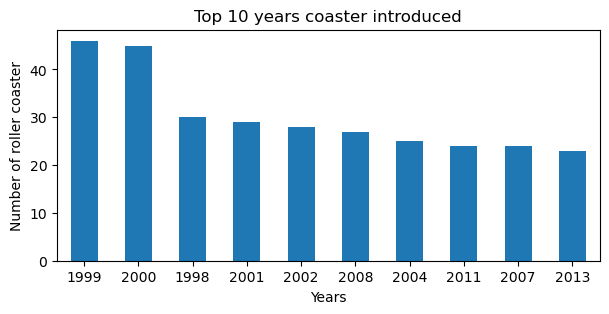

In [30]:
df["year_introduced"].value_counts().head(10).sort_values(ascending=False).plot(
    kind="bar", 
    title= "Top 10 years coaster introduced", 
    xlabel="Years", 
    ylabel="Number of roller coaster",
    figsize=(7, 3)
)

# Rotating labels
plt.xticks(rotation=0)  

plt.show()


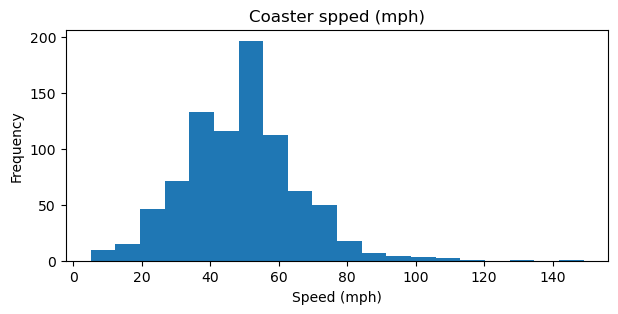

In [31]:
df["speed_mph"].plot(
    kind="hist",
    title="Coaster spped (mph)",
    xlabel="Speed (mph)",
    bins=20,
    figsize=(7, 3)
)
plt.show()

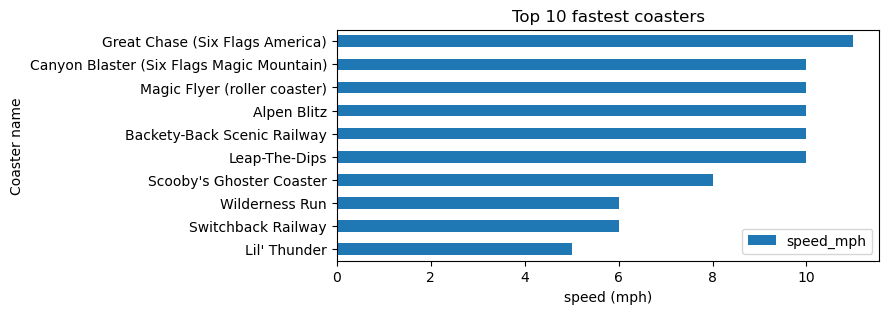

In [32]:
df.sort_values(by="speed_mph", ascending=True).head(10).plot(
    x="coaster_name", 
    y="speed_mph",  
    kind="barh",
    title="Top 10 fastest coasters",
    xlabel="speed (mph)",
    ylabel="Coaster name",
    figsize=(7, 3)  
)
plt.show()

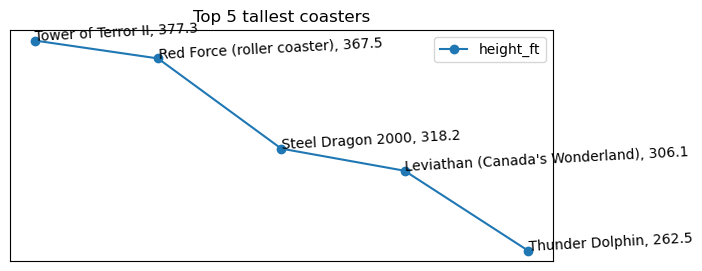

In [33]:
tall_df = df.sort_values(by="height_ft", ascending=False).head(5)
tall_df = tall_df.reset_index(drop=True).copy()
ax = tall_df.plot(y="height_ft", kind="line", figsize=(7, 3), marker="o")

# Adding text in chart
for i in range(tall_df.shape[0]):
    label = f"{tall_df['coaster_name'].iloc[i]}, {tall_df['height_ft'].iloc[i]}"
    ax.text(i, tall_df['height_ft'].iloc[i], label, rotation=3)

# Disabling labels
plt.xticks([])  
plt.yticks([])

plt.title("Top 5 tallest coasters")
plt.show()

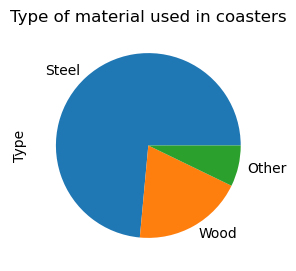

In [34]:
df["type_main"].value_counts().plot(
    kind="pie",
    ylabel="Type",
    title="Type of material used in coasters",
    figsize=(7, 3)
)
plt.show()

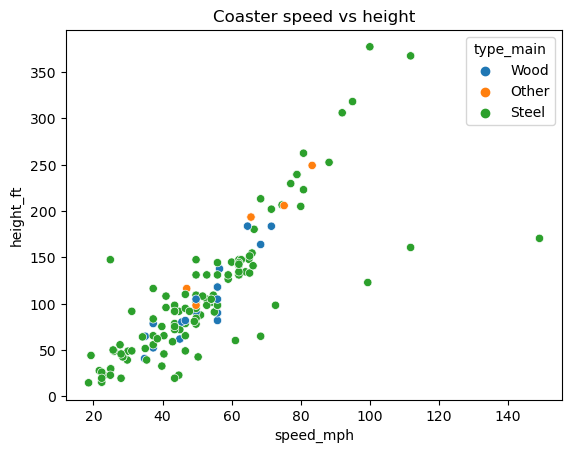

In [35]:
ax = sns.scatterplot(
    data=df,
    x="speed_mph",
    y="height_ft",
    hue="type_main"
)
ax.set_title("Coaster speed vs height")
plt.show()

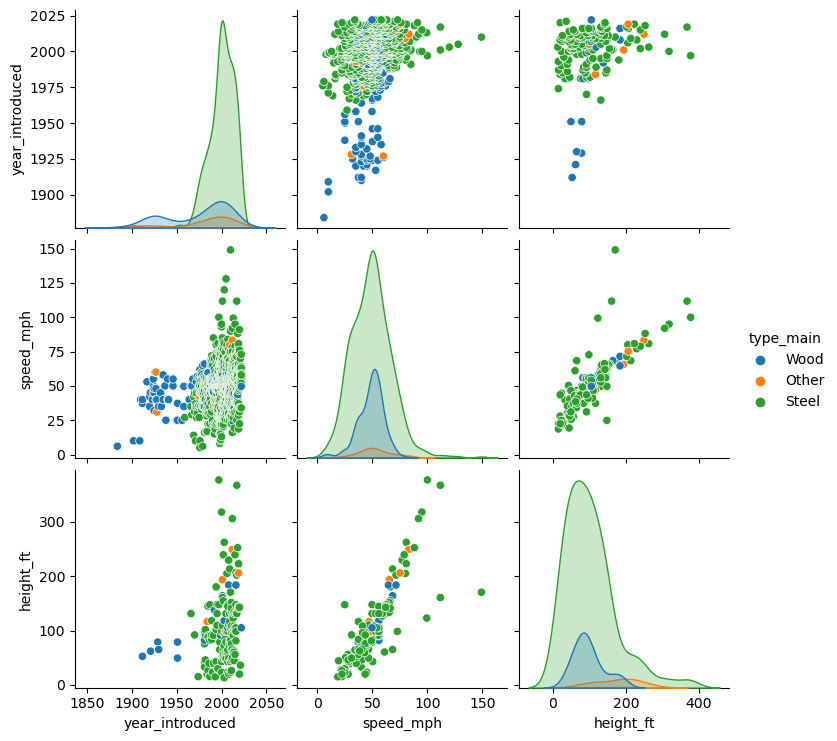

In [36]:
sns.pairplot(data=df, vars=["year_introduced", "speed_mph", "height_ft"], hue="type_main")
plt.show()

In [37]:
df_corr = df[["year_introduced", "speed_mph", "height_ft", "inversions_clean", "gforce_clean"]]
df_corr = df_corr.dropna().corr().copy()
df_corr

,year_introduced,speed_mph,height_ft,inversions_clean,gforce_clean
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


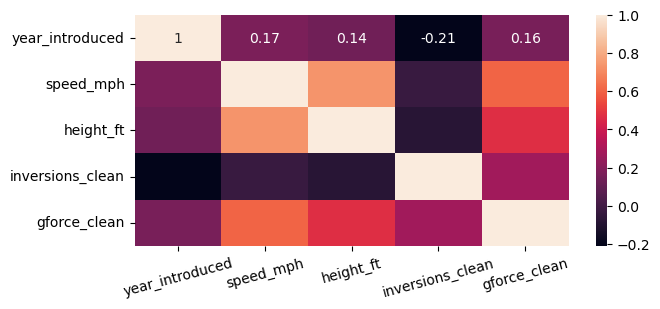

In [38]:
plt.figure(figsize=(7, 3))
sns.heatmap(df_corr, annot=True)
plt.xticks(rotation=15)
plt.show()

# Faster coster location 

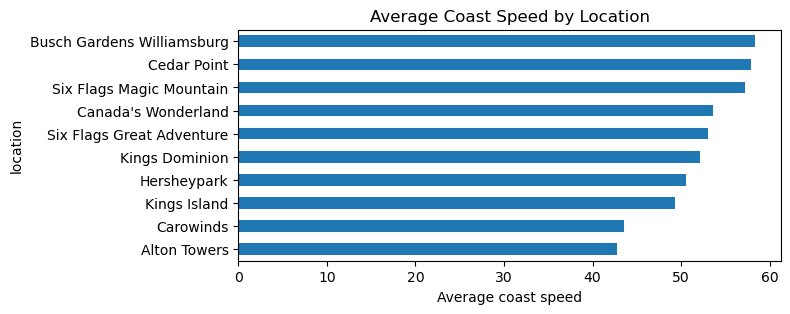

In [39]:
ax = df.query("location != 'Other'").groupby("location")["speed_mph"].agg(["mean", "count"]).query("count >= 10").sort_values("mean")["mean"]
ax.plot(
    kind='barh', 
    figsize=(7, 3), 
    xlabel="Average coast speed",
    title="Average Coast Speed by Location"
)
plt.show()